Model Accuracy: 0.94
Confusion Matrix:
 [[43  1]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        44
           1       0.89      0.80      0.84        10

    accuracy                           0.94        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.94      0.94      0.94        54



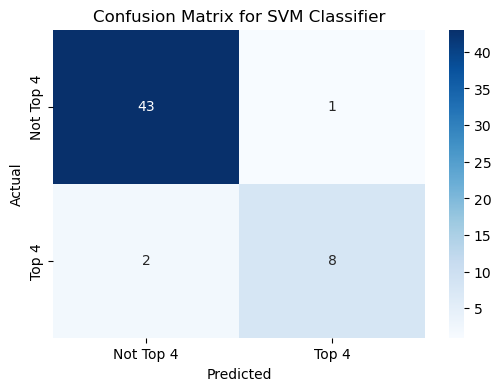

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
data = pd.read_csv(r"C:\Users\ShePlay\Documents\GitHub\handson-ml2-master\handson-ml2-master\datasets\lbf\lbf_historical_stats.csv")
data.head()

# Drop rows with missing values (if any)
data.dropna(inplace=True)

# Define the target variable: "Top 4" vs "Not Top 4"
data['top_4'] = data['posicion'] <= 4  # Clubs in the top 4 get True, others False

# Encode categorical features
label_encoder = LabelEncoder()
data['club_encoded'] = label_encoder.fit_transform(data['club'])
data['torneo_encoded'] = label_encoder.fit_transform(data['torneo'])

# Select features (X) and target (y)
features = ['jj', 'jg', 'je', 'jp', 'gf', 'gc', 'dif', 'pts', 'club_encoded', 'torneo_encoded']
X = data[features]
y = data['top_4'].astype(int)  # Convert boolean to binary (1 = Top 4, 0 = Not Top 4)

# Split data into training and test sets (80%-20% split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (SVM is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVM classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the results
print(f"Model Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Top 4', 'Top 4'], yticklabels=['Not Top 4', 'Top 4'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SVM Classifier")
plt.show()
